Shape: (9994, 24)
Columns: ['Category', 'City', 'Country/Region', 'Order Date', 'Year', 'Month', 'Order ID', 'Postal Code', 'Product ID', 'Product Name', 'Region', 'Segment', 'Ship Date', 'Ship Mode', 'Ship Status', 'State', 'Sub-Category', 'Days to Ship Actual', 'Days to Ship Scheduled', 'Discount', 'Profit', 'Quantity', 'Sales', 'Sales Forecast']

=== KPIs ===
Total Sales: 2,297,354
Total Profit: 598,623
Total Orders (Distinct Order ID): 5,009
Avg Sales per Order (AVG Sales): 229.87


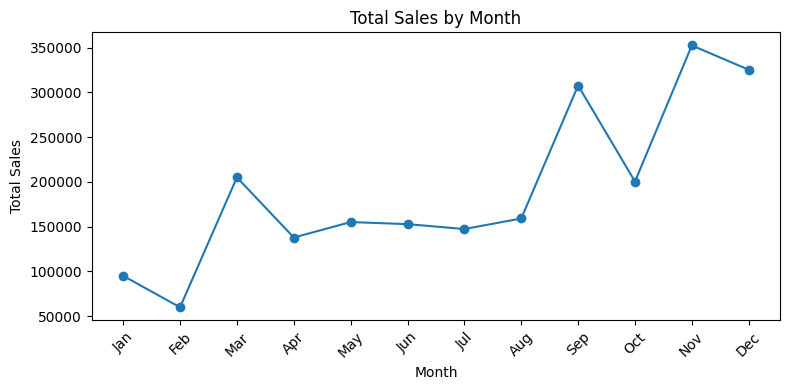

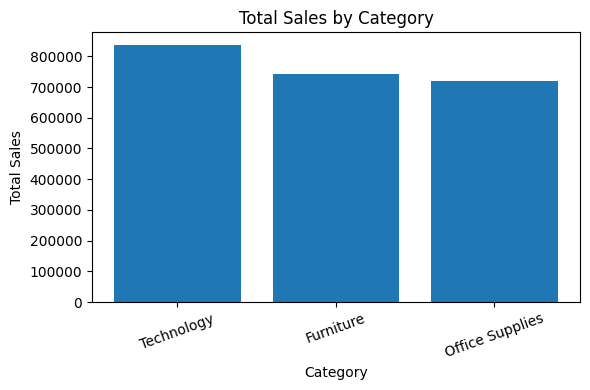

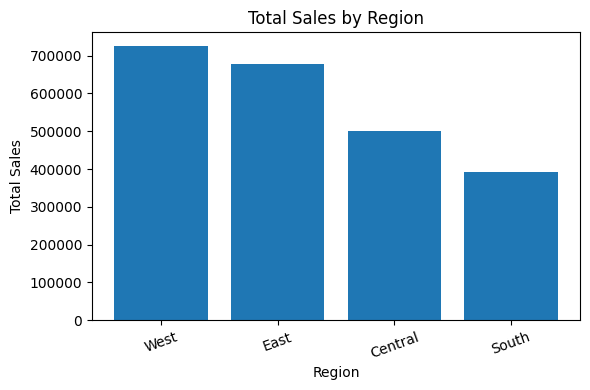

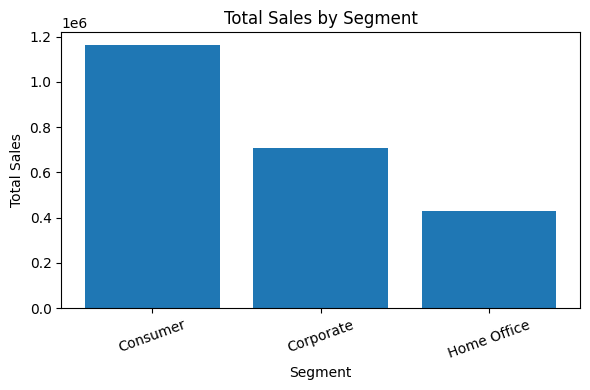


=== Top 10 Products by Total Sales ===


,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61600
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27454
444,Cisco TelePresence System EX90 Videoconferenci...,22638
785,HON 5400 Series Task Chairs for Big and Tall,21870
685,GBC DocuBind TL300 Electric Binding System,19824
687,GBC Ibimaster 500 Manual ProClick Binding System,19026
804,Hewlett Packard LaserJet 3310 Copier,18840
786,HP Designjet T520 Inkjet Large Format Printer ...,18375
682,GBC DocuBind P400 Electric Binding System,17965
812,High Speed Automatic Electric Letter Opener,17031


/tmp/ipython-input-3650197324.py:112: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


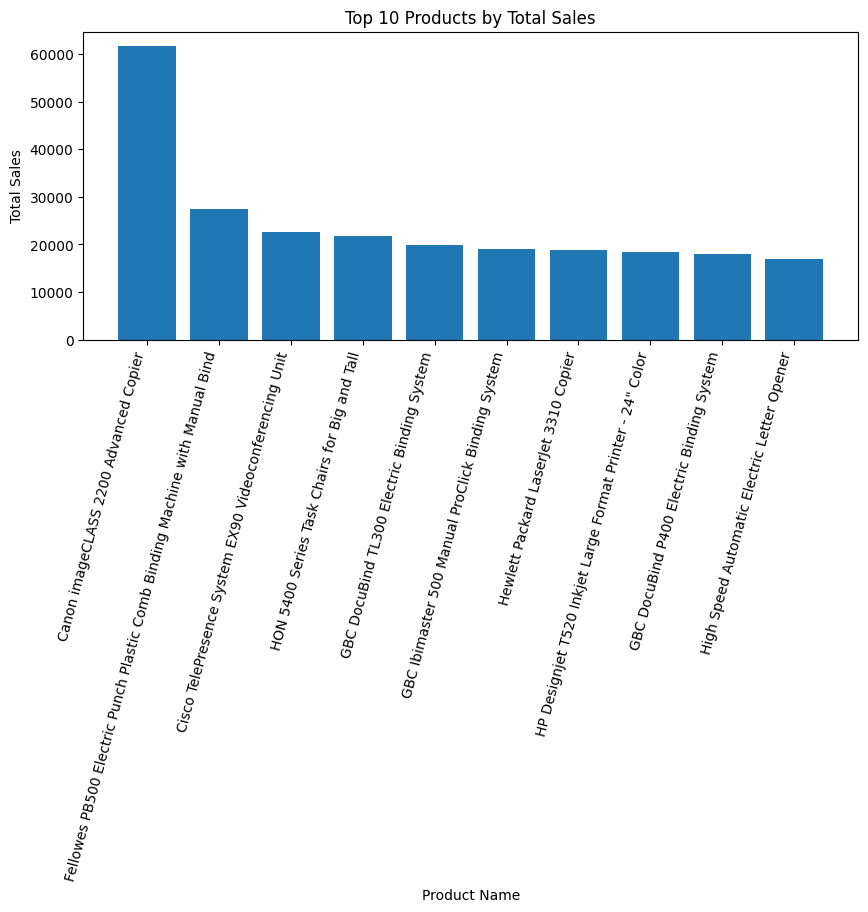


=== Quick Validation ===
Total Sales: 2297354
Total Profit: 598623
Total Orders: 5009
Avg Sales per Order: 229.87


In [2]:
# =========================
# 1) SETUP + LOAD DATA
# =========================
import pandas as pd
import matplotlib.pyplot as plt

FILE_PATH = "Superstore Sales Dataset.xlsx"

df = pd.read_excel(FILE_PATH, sheet_name="data")

# Quick sanity check
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Ensure Order Date is datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

# =========================
# 2) KPIs
# =========================
# Power BI cards you built:
# - Total Sales: SUM(Sales)
# - Total Profit: SUM(Profit)
# - Total Orders: DISTINCTCOUNT(Order ID)
# - Avg Sales per Order: AVERAGE(Sales)  (average per row, NOT per order)
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_orders = df["Order ID"].nunique()
avg_sales_per_order = df["Sales"].mean()

print("\n=== KPIs ===")
print(f"Total Sales: {total_sales:,.0f}")
print(f"Total Profit: {total_profit:,.0f}")
print(f"Total Orders (Distinct Order ID): {total_orders:,}")
print(f"Avg Sales per Order (AVG Sales): {avg_sales_per_order:,.2f}")

# =========================
# 3) SALES BY MONTH
# =========================
# In your dataset
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
month_to_num = {m:i+1 for i,m in enumerate(month_order)}

# Create a numeric month index for correct ordering
df["MonthNum"] = df["Month"].map(month_to_num)

# If Month is not in that format (e.g., full month names), fallback to Order Date month:
missing_monthnum = df["MonthNum"].isna().any()
if missing_monthnum:
    df["MonthNum"] = df["Order Date"].dt.month
    # Optional: create month label in English
    df["MonthLabel"] = df["Order Date"].dt.strftime("%b")
else:
    df["MonthLabel"] = df["Month"]

sales_by_month = (
    df.groupby(["MonthNum","MonthLabel"], as_index=False)["Sales"]
      .sum()
      .sort_values("MonthNum")
)

plt.figure(figsize=(8,4))
plt.plot(sales_by_month["MonthLabel"], sales_by_month["Sales"], marker="o")
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =========================
# 4) SALES BY CATEGORY / REGION / SEGMENT
# =========================
def bar_sales_by(field, title):
    g = df.groupby(field, as_index=False)["Sales"].sum().sort_values("Sales", ascending=False)
    plt.figure(figsize=(6,4))
    plt.bar(g[field], g["Sales"])
    plt.title(title)
    plt.xlabel(field)
    plt.ylabel("Total Sales")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()
    return g

cat_sales = bar_sales_by("Category", "Total Sales by Category")
reg_sales = bar_sales_by("Region", "Total Sales by Region")
seg_sales = bar_sales_by("Segment", "Total Sales by Segment")

# =========================
# 5) TOP 10 PRODUCTS BY SALES
# =========================
top10_products = (
    df.groupby("Product Name", as_index=False)["Sales"]
      .sum()
      .sort_values("Sales", ascending=False)
      .head(10)
)

print("\n=== Top 10 Products by Total Sales ===")
display(top10_products)

# Optional: bar chart for top 10 (if you want)
plt.figure(figsize=(10,4))
plt.bar(top10_products["Product Name"], top10_products["Sales"])
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()

# =========================
# 6) (OPTIONAL) QUICK VALIDATION AGAINST POWER BI
# =========================
# These should be close to what you saw:
# total_sales ~ 2,000,000
# total_profit ~ 599,000
# total_orders ~ 5009
# avg_sales_per_order ~ 229.87
print("\n=== Quick Validation ===")
print("Total Sales:", round(total_sales, 0))
print("Total Profit:", round(total_profit, 0))
print("Total Orders:", total_orders)
print("Avg Sales per Order:", round(avg_sales_per_order, 2))
